# Описание проекта

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.


## Инструкция по выполнению проекта

1. Загрузите и изучите данные.
2. Ответьте на вопрос и обоснуйте решение.
   Признаки умножают на обратимую матрицу. 
   Изменится ли качество линейной регрессии? (Её можно обучить заново.)
       a. Изменится. Приведите примеры матриц.
       b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.


## Описание данных

Набор данных находится в файле /datasets/insurance.csv

- **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Изучение данных

In [2]:
data = pd.read_csv('./datasets/insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
data.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1166,0,35.0,31600.0,0,0
2864,1,37.0,45100.0,2,0
2012,1,33.0,44300.0,2,0
295,0,23.0,33300.0,2,0
2841,1,26.0,47400.0,0,0
1516,0,36.0,37400.0,0,0
3594,0,21.0,63400.0,1,0
1968,1,34.0,42300.0,1,0
1401,1,29.0,27800.0,0,0
3988,1,24.0,35300.0,0,0


На первый взгляд данные выглядят совершенно нормальными. У нас есть 5000 тысяч строк без пропусков, с бинарным полом, адекватным возрастом и количеством членов семьи, а так же зарплатой, хотя зарплата в 5300 очень смущает.

С помощью pairplot сразу посмотрим на распределения всех столбцов и убедимся, что нету ничего необычного и заодно посмотрим нету ли корреляции между данными.

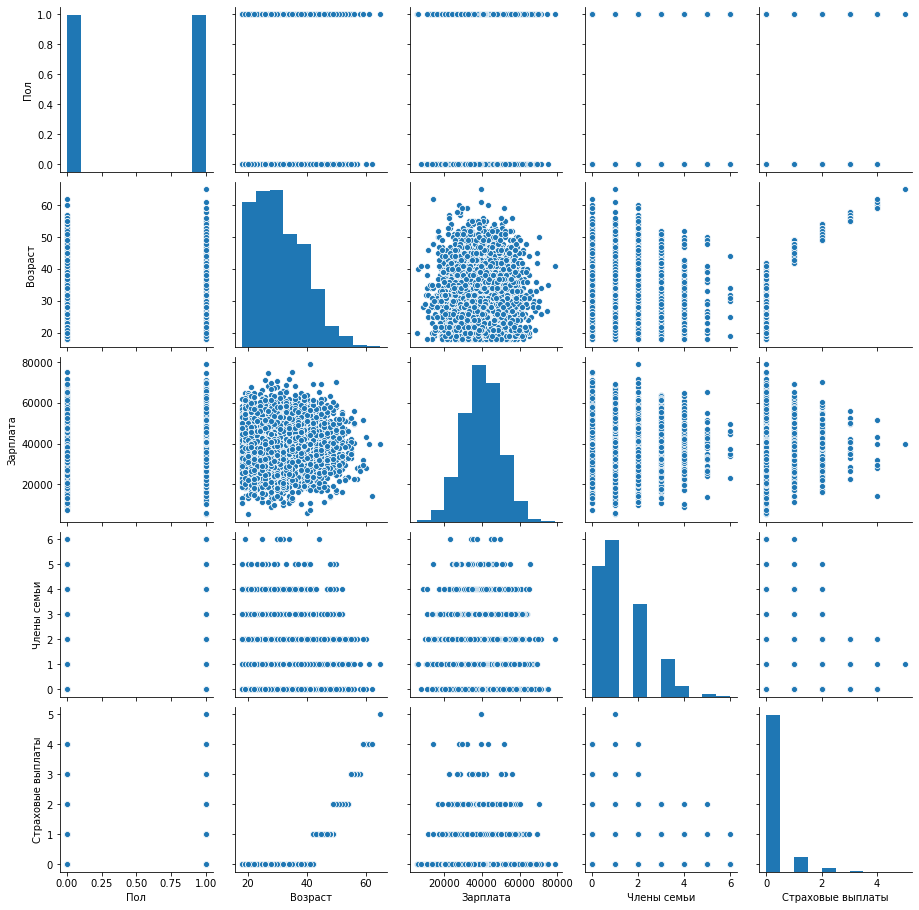

In [6]:
sns.pairplot(data);

pairplot показал нам что с данными всё в порядке, но так же можно заметить положительную корреляцию между возрастом и количеством выплат, что вполне естественно, за целую жизнь многое может произойти.

Проверим данные на дубликаты

In [7]:
data.duplicated().sum()

153

Мы нашли 153 полных дубликата, что очень подозрительно, уж слишком подозрительны совпадения ещё и по зарплате, уберем их из нашей выборки.

In [8]:
print('Количество данных до удаления дупликатов: {}'.format(data.shape[0]))
data.drop_duplicates(inplace=True)
print('Количество данных после удаления дупликатов: {}'.format(data.shape[0]))

Количество данных до удаления дупликатов: 5000
Количество данных после удаления дупликатов: 4847


## Проверка изменения качества линейной регрессии при умножении признаков на произвольную обратимую матрицу

Мы знаем формулу вычисления предсказания, и знаем формулу вычисления w. Попробуем вывести формулу для предсказаний, при признаках которые были умножены на произвольную обратимую матрицу.

<img src="https://i.ibb.co/ckz3KJZ/N6c6-PJce2-X5-UYDDi-Xl1-MHoyz-Dykbu-Hg-I4zfuj50z.jpg" alt="N6c6-PJce2-X5-UYDDi-Xl1-MHoyz-Dykbu-Hg-I4zfuj50z" border="0">

Нам удалось доказать, что умножение матрицы признаков на произвольную обратимую матрицу никак не повлияет на качество линеной регрессии. Представив произведение матриц X' как XP, мы смогли вывести доказательство, что a' = X'w' = Xw = a.

## Выбор алгоритма для шифрования данных

Проведя исследование выше, мы выяснили что умножение матрицы признаков на произвольную обратимую матрицу никак не повлияет на качество линейной регресии. Именно умножение на произвольную обратимую матрицу поможет нам изменить данные, таким образом, что персональные данные нельзя будет узнать, не повлияв на результат линейной регрессии.

**Алгоритм:**
1. Выделяем признаки и целевой признак из датасета
2. Генерируем случайную матрицу с помощью функции numpy.random.normal()
3. Проверяем сгенерированную матрицу на обратимость с помощью функции numpy.linalg.inv()
4. Если функция выдала ошибку, возвращаемся ко второму шагу, пока не найдем обратимую матрицу
5. Умножаем матрицу признаков на полученную матрицу

## Применение алгоритма и проверка результатов

Выделяем признаки и целевой признак из датасета

In [9]:
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты']

Генерируем случайную матрицу с помощью функции numpy.random.normal() и производим проверку её обратимости.

In [10]:
P = []
P_inv = []

while True:
    try:
        P = np.random.normal(size=(4,4))
        print('Случайная квадратная матрица:')
        display(P)
        print()
        P_inv = np.linalg.inv(P)
        print('Обратная ей матрица:')
        display(P_inv)
    except:
        print('Матрица не обратима.')
        print()
        P = []
        
    if(np.size(P) > 0):
        break

Случайная квадратная матрица:


array([[ 0.02872071,  0.80002264, -1.55852206, -1.37497196],
       [-0.33070814,  0.65337333, -0.45259506,  2.18421437],
       [ 0.76440939,  1.12924019,  0.9384763 ,  0.05945466],
       [-1.49951839, -0.46476153, -0.43826414,  0.31734963]])


Обратная ей матрица:


array([[-0.033561  ,  0.12245692, -0.42131988, -0.9093068 ],
       [ 0.31022742,  0.12330624,  0.7411799 ,  0.35657879],
       [-0.3353479 , -0.27238135,  0.5280473 ,  0.32283139],
       [-0.16736911,  0.38304575, -0.17608596, -0.17744702]])

Проверим, что всё посчиталось правильно, перемножив матрицы и получив единичную матрицу, с 1 по диагонали.

In [11]:
P @ P_inv

array([[ 1.00000000e+00,  5.55111512e-17,  1.11022302e-16,
         0.00000000e+00],
       [ 1.11022302e-16,  1.00000000e+00,  1.80411242e-16,
         5.55111512e-17],
       [ 5.55111512e-17,  0.00000000e+00,  1.00000000e+00,
         1.11022302e-16],
       [ 0.00000000e+00,  1.38777878e-17, -5.55111512e-17,
         1.00000000e+00]])

Теперь умножим матрицу признаков на нашу произвольную матрицу и посмотрим, как изменились данные.

In [12]:
X_modified = X @ P
X_modified

,0,1,2,3
0,37899.676048,56037.437090,46527.871129,3037.446223
1,29030.844831,42940.717707,35640.841635,2360.068229
2,16043.006711,23732.991858,19694.876972,1311.890043
3,31865.927769,47102.107323,39124.080545,2525.762456
4,19941.854043,29492.263487,24480.000158,1611.549614
...,...,...,...,...
4995,27277.156456,40331.239784,33490.054600,2184.324006
4996,40042.308584,59193.935991,49160.331447,3190.004737
4997,25903.865214,38293.380452,31804.418026,2059.831906
4998,24984.441729,36939.934229,30675.344494,1991.797122


Признаки изменились до неузнаваемости, теперь сравним качество линейной регрессии с исходными признаками и с преобразованными.

Подготовим наши данные для обучения с помощью StandartScaler. Так как наши данные сильно отличаются, воспользуемся двумя Scaller'ами для каждого набора признаков.

In [13]:
scaller_source_features = StandardScaler()
scaller_modified_features = StandardScaler()

In [14]:
X_scaled = scaller_source_features.fit_transform(X)
X_modified_scaled = scaller_modified_features.fit_transform(X_modified)

Создадим две модели линейной регрессии, одну обучим на исходных признаках, а вторую на преобразованных признаках.

In [15]:
model_source_features = LinearRegression()
model_modified_features = LinearRegression()

In [16]:
model_source_features.fit(X_scaled, y)
model_modified_features.fit(X_modified_scaled, y);

In [17]:
predict_sorce_features = model_source_features.predict(X_scaled)
predict_modified_features = model_modified_features.predict(X_modified_scaled)

In [18]:
print('R2 модели с исходными данными: {}'.format(r2_score(y, predict_sorce_features)))
print('R2 модели с модифицированными данными: {}'.format(r2_score(y, predict_modified_features)))

R2 модели с исходными данными: 0.4302010044852067
R2 модели с модифицированными данными: 0.43020100448520404


Как видим наши метрики минимально отличаются друг от друга, возможно это связано внутренними механизмами модели LinearRegression из sklearn, а это значит, что качество модели осталось прежним, даже после преобразования данных и использования Scaler.

**Вывод:**
Этот проект показал нам, что данные можно модифицировать таким образом, чтобы качество модели не ухудшалось, главное подобрать подходящий метод, для линейной регрессии подходит метод умножения матрицы признаков на произвольную обратимую матрицу, таким образом мы можем анонимизировать исходные данные, не задумываясь о самих значениях этих данных.